In [9]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import sem

%matplotlib inline
%config Completer.use_jedi = False


#import required sklearn for logistic regression classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [10]:
#Load the filtered cisform switch file and the file containing all genes for COAD
#Only matched samples / files used

cis_eQTL_95_file = '/Users/jake/OneDrive - University of Glasgow/Project/COAD/Survival/COAD_ciseQTL_survival.csv'
all_genes_file = '/Users/jake/OneDrive - University of Glasgow/Project/COAD/Survival/COAD_all_genes_survival.csv'

cis_eQTL_95_survival = pd.read_csv(cis_eQTL_95_file,header=[0,1],sep='\t',index_col=[0])
all_genes_survival = pd.read_csv(all_genes_file,header=[0,1],sep='\t',index_col=[0])


In [11]:
cis_eQTL_95_survival

Gene_symbol,FABP2,ZNF117,XKR9,NUDT13,C2orf74,METTL18,WFDC3,CPNE1,N6AMT1,ULK4,...,DHFR,SLC13A4,ZNF239,RGS6,PCCB,ZNF585A,ZNF79,STMP1,RAB33B,400_days_status
Gene_ensembl_id,ENSG00000145384,ENSG00000152926,ENSG00000221947,ENSG00000166321,ENSG00000237651,ENSG00000171806,ENSG00000124116,ENSG00000214078,ENSG00000156239,ENSG00000168038,...,ENSG00000228716,ENSG00000164707,ENSG00000196793,ENSG00000182732,ENSG00000114054,ENSG00000196967,ENSG00000196152,ENSG00000243317,ENSG00000172007,400_days_status
TCGA-AA-A03F,2.709842,0.181619,0.124308,1.604591,0.000000,1.333010,0.403676,18.364731,1.363635,1.451073,...,5.247992,0.252350,1.547775,0.090526,10.741301,0.195528,2.987313,3.298499,0.740167,1
TCGA-DM-A28A,0.382833,1.533562,0.058093,1.104367,0.231414,4.469630,1.217659,75.078574,2.759628,0.517221,...,3.007623,0.100349,4.257764,0.055382,7.505009,0.780217,1.316935,11.733793,1.784212,1
TCGA-AA-3848,0.194745,0.154761,0.017654,1.175887,0.136514,0.917450,2.149889,128.975478,1.261180,0.324842,...,2.564328,0.498878,2.912562,0.100282,10.049904,0.378086,1.437493,3.020485,0.740403,0
TCGA-F4-6459,1.383805,1.106079,0.021288,1.178841,0.315506,4.807043,5.081061,65.013593,1.123479,0.350635,...,4.704166,0.041487,2.468356,0.118596,3.691798,0.919534,1.399325,12.047792,2.471713,0
TCGA-A6-2686,15.021974,0.650049,2.605588,0.759334,0.453231,3.164625,0.181686,45.640195,1.026470,0.626215,...,3.076986,0.093458,3.483105,0.060534,16.008886,0.655671,2.196438,20.815849,4.531446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DM-A288,5.508026,3.047379,0.100438,1.659487,0.069036,4.308173,0.217441,29.973731,1.961719,0.552436,...,6.226959,0.091344,1.354782,0.020480,8.779410,0.505544,1.885513,16.568795,1.466495,1
TCGA-AA-A02E,5.073624,0.765542,0.883805,1.075646,0.032544,4.624174,0.471511,60.509076,2.422114,0.562058,...,3.444213,0.258360,6.799154,0.099303,8.562032,0.357472,1.799092,8.540639,1.166893,0
TCGA-AZ-4614,0.534245,1.542238,2.938143,0.429654,0.000000,5.084531,0.800671,46.565906,1.682191,0.365864,...,1.082766,0.045047,2.782124,0.026933,8.671056,0.447484,0.888777,12.262930,2.034571,0


In [12]:
#Check cisform_switch for and missing data

cis_eQTL_95_survival.isnull().sum().unique()

array([0])

In [13]:
#Check all genes file for missing data

all_genes_survival.isnull().sum().sort_values(ascending = False)
all_genes_survival.isnull().sum().unique()


array([0])

In [14]:
#Check survival ratio ... since almost equal will not use 'class_weight' in model

survival_ratio = sum(cis_eQTL_95_survival['400_days_status','400_days_status']==1) / sum(cis_eQTL_95_survival['400_days_status','400_days_status']==0)
survival_ratio

1.06

In [15]:
#Do an initial train test split to extract an 'unseen' test set of data (30%) for both cisform and all genes
#Set stratify as y to keep same ratio in test data

X_full_cis = cis_eQTL_95_survival.drop('400_days_status',axis=1,level=0)
y_full_cis = cis_eQTL_95_survival['400_days_status','400_days_status']

X_develop_cis, X_test_cis, y_develop_cis, y_test_cis = train_test_split(X_full_cis, y_full_cis, test_size=0.3, random_state=1,stratify=y_full_cis)


In [16]:
#Repeat for all genes .. using random sample of same number of genes as cisform

X_full_all = all_genes_survival.drop('400_days_status',axis=1,level=0)
y_full_all = all_genes_survival['400_days_status','400_days_status']

#Take a random sample of genes .. use X_full_cis.columns to acquire same num of genes as cisform
X_random = X_full_all.sample(n=len(X_full_cis.columns),axis=1)

X_develop_ran, X_test_ran, y_develop_ran, y_test_ran = train_test_split(X_random, y_full_all, test_size=0.3, random_state=1,stratify=y_full_all)


In [17]:
#First do simple Logistic Regression with gridsearch to determine optimal parameters

def grid_search_LR(X,y):
    '''Perform logistic regression grid search. Supply development X and y data.'''

    #Logistic Regression with dual = False since n_samples > n_features
    classifier = LogisticRegression(dual=False)
    
    #Want to add PCA to pipeline
    pca = PCA()

    #Pipeline containing Log Reg classifier and Log Reg with deafault settings for feature engineering
    #Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',pca),
                                  ('feature_selection', SelectFromModel(LogisticRegression(dual=False))),
                                  ('classifier',classifier)])


    #Two dictionaries of potential potential parameters to account for penalties and solvers that can/can't go togther
    #The PCA searches from 1 upto max number of features / genes in 5 steps (since can't search PC's more than max num of features)
    param_grid = [
        {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'],
         'classifier__C':[0.01,0.1,1,10,100], 'pca__n_components': [1,2,3,5,10]},
        {'classifier__penalty': ['l2'], 'classifier__solver': ['liblinear', 'sag', 'saga','newton-cg'],
         'classifier__C':[0.01,0.1,1,10,100],'pca__n_components':[1,2,3,5,10] }
    ]


    #Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
    r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

    grid_search = GridSearchCV(LR_pipeline, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

    #Fit on development data
    grid_search.fit(X, y)
    
    #Create dictinoary to store the best parameters
    best_params = {}
    
    for k,v in grid_search.best_params_.items():
        
        best_params[k] = v
 
    #Return the best_params dictinoary => run this fuction and save as new variable in relation to what X and y run
    return best_params

In [18]:
#Run the gridsearch for both the cisform and all genes development data to create dictionaries to plug into CV

best_params_cis = grid_search_LR(X_develop_cis,y_develop_cis)
best_params_cis

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'classifier__C': 1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear',
 'pca__n_components': 1}

In [19]:
best_params_ran = grid_search_LR(X_develop_ran,y_develop_ran)
best_params_ran

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

{'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga',
 'pca__n_components': 1}

In [20]:
#Now define model functions that will return cross_validate to evalaute model overall

In [21]:
# Create a function that cross validates the data

def LR_model_cv(X, y, best_params_dict, repeats = 3, splits = 3):
    '''LR model function. Takes in X and y development data, repeats, splits and the required best_params dictinoary'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_cis from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=best_params_dict['pca__n_components'])),
                                   ('feature_selection', SelectFromModel(classifier,threshold='mean')),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    #Define performance metrics to return 
    F1 = str(f"Mean F1 weighted = {scores_cv['test_f1_weighted'].mean():.3f} SEM = {sem(scores_cv['test_f1_weighted']):.3f}")
    ROCAUC = str(f"Mean ROCAUC score = {scores_cv['test_roc_auc'].mean():.3f} SEM = {sem(scores_cv['test_roc_auc']):.3f} ")
    Accuracy = str(f"Mean balanced accuracy score = {scores_cv['test_balanced_accuracy'].mean():.3f} SEM = {sem(scores_cv['test_balanced_accuracy']):.3f} ")
    Precision = str(f"Mean weighted precision = {scores_cv['test_precision_weighted'].mean():.3f} SEM = {sem(scores_cv['test_precision_weighted']):.3f} ")
    Recall = str(f"Mean weighted recall = {scores_cv['test_recall_weighted'].mean():.3f} SEM = {sem(scores_cv['test_recall_weighted']):.3f} ")
    
    return F1, ROCAUC, Accuracy, Precision, Recall

In [22]:
#Compare the two cross validations with 3 repeats and 3 splits

LR_model_cv(X_develop_cis,y_develop_cis,best_params_cis)

('Mean F1 weighted = 0.562 SEM = 0.031',
 'Mean ROCAUC score = 0.586 SEM = 0.058 ',
 'Mean balanced accuracy score = 0.569 SEM = 0.030 ',
 'Mean weighted precision = 0.574 SEM = 0.035 ',
 'Mean weighted recall = 0.574 SEM = 0.028 ')

In [23]:
LR_model_cv(X_develop_ran,y_develop_ran,best_params_ran)

('Mean F1 weighted = 0.404 SEM = 0.038',
 'Mean ROCAUC score = 0.415 SEM = 0.033 ',
 'Mean balanced accuracy score = 0.422 SEM = 0.034 ',
 'Mean weighted precision = 0.409 SEM = 0.038 ',
 'Mean weighted recall = 0.417 SEM = 0.035 ')

In [24]:
#Now create models utilising the above parameters to perform a test on the unseeen test data

In [25]:
# Create function to perform test

def LR_model_test(X_develop,y_develop,X_test,y_test, best_params_dict):
    '''Function fits the predetermined LR_pipeline for the data before predicting on the unseen test data'''
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=best_params_dict['pca__n_components'])),
                                   ('feature_selection', SelectFromModel(classifier,threshold='mean')),
                                   ('classifier',classifier)])
    
    #Fit on the develop data
    LR_pipeline.fit(X_develop,y_develop)
    
    #Then make predictions on the unseen test data from the initial train test split
    predictions = LR_pipeline.predict(X_test)
    
    #Return classification report and ROCAUC score
    print (classification_report(predictions,y_test,target_names=['Desceased Before - 0','Deceased After - 1']))
    ROCAUC =  str(f'ROCAUC score: {roc_auc_score(predictions,y_test):.3f}')
    
    return ROCAUC

In [26]:
#Now run on both set of data to compare the results

In [27]:
LR_model_test(X_develop_cis,y_develop_cis,X_test_cis,y_test_cis,best_params_cis)

              precision    recall  f1-score   support

  Normal - 0       0.67      0.53      0.59        19
  Cancer - 1       0.44      0.58      0.50        12

    accuracy                           0.55        31
   macro avg       0.55      0.55      0.54        31
weighted avg       0.58      0.55      0.55        31



'ROCAUC score: 0.555'

In [28]:
LR_model_test(X_develop_ran,y_develop_ran,X_test_ran,y_test_ran,best_params_ran)

              precision    recall  f1-score   support

  Normal - 0       0.73      0.55      0.63        20
  Cancer - 1       0.44      0.64      0.52        11

    accuracy                           0.58        31
   macro avg       0.59      0.59      0.57        31
weighted avg       0.63      0.58      0.59        31



'ROCAUC score: 0.593'

In [29]:
#Additional functions for extra plots below

In [36]:
#Create function to extract the PCA explained variance function and make plot

def grid_search_PCA(X,y,best_params_dict):
    '''Perform logistic regression grid search. Supply development X and y data.'''

    #Logistic Regression with dual = False since n_samples > n_features
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Want to add PCA to pipeline
    pca = PCA()

    #Pipeline containing Log Reg classifier and Log Reg with deafault settings for feature engineering
    #Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',pca),
                                  ('feature_selection', SelectFromModel(classifier)),
                                  ('classifier',classifier)])


    
    #The PCA searches from 1 upto max number of features / genes in 5 steps (since can't search PC's more than max num of features)
    param_grid = {'pca__n_components':[1,2,3,5,10] }



    #Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
    r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

    grid_search = GridSearchCV(LR_pipeline, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

    #Fit on development data
    grid_search.fit(X, y)
    
    #Now to plot the PCA variance ratio
    
    # first Fit the PCA to X
    pca.fit(X)
    
 
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
    ax0.plot(np.arange(1, pca.n_components_ + 1),
             pca.explained_variance_ratio_, linewidth=2)
    ax0.set_ylabel('PCA explained variance ratio')

    ax0.axvline(grid_search.best_estimator_.named_steps['pca'].n_components,
                linestyle=':', label='n_components chosen')
    ax0.legend(prop=dict(size=8))

    # For each number of components, find the best classifier results
    results = pd.DataFrame(grid_search.cv_results_)
    components_col = 'param_pca__n_components'
    best_clfs = results.groupby(components_col).apply(
        lambda g: g.nlargest(1, 'mean_test_score'))

    best_clfs.plot(x=components_col, y='mean_test_score',
                   legend=False, ax=ax1)
    ax1.set_ylabel('ROCAUC Score')
    ax1.set_xlabel('n_components')

    plt.xlim(-1, 11)

    plt.tight_layout()  
    
    return fig

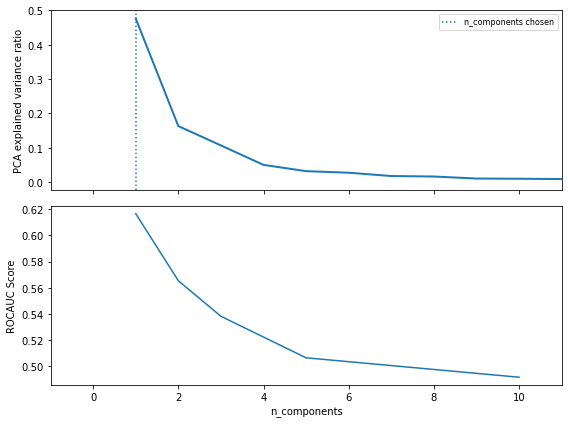

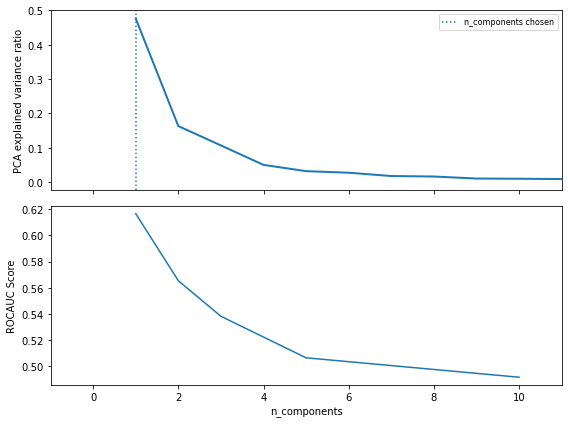

In [37]:
grid_search_PCA(X_develop_cis,y_develop_cis,best_params_cis)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:92: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1346, in fit
    accept_large_sparse=solver != 'liblinear')
  File "/Users/jake/

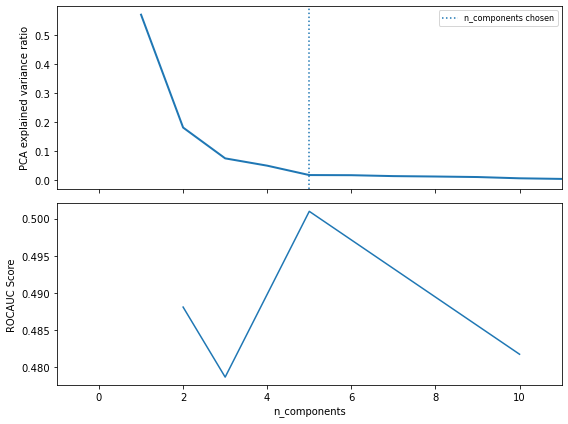

In [38]:
PCA_plot_ran = grid_search_PCA(X_develop_ran,y_develop_ran,best_params_ran)

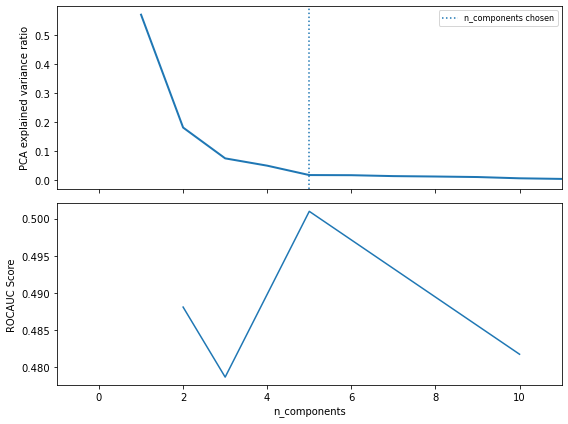

In [39]:
PCA_plot_ran

In [34]:
#Def function to extract the features selected during pipeline SelectFromModel as a list 

def LR_model_features(X, y, best_params_dict, repeats = 3, splits = 3):
    '''LR model function. Takes in X and y development data, repeats, splits, the required best_params dictinoary and the max_features to return from SelectFromModel'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_cis from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=best_params_dict['pca__n_components'])),
                                   ('feature_selection', SelectFromModel(classifier,threshold='mean')),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    
    #To get the features selected via SelectFromModel need to fit the pipeline and extract the named_steps['feature_selection']
    selected_features = LR_pipeline.named_steps['feature_selection'].fit(X,y)
    
    #Can then plug selected_features.get_support into X.columns (which is full set of features)
    features = X.columns[selected_features.get_support()]
    
    return list(features)

In [35]:
LR_model_features(X_develop_cis,y_develop_cis,best_params_cis)


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[('FABP2', 'ENSG00000145384'),
 ('MMUT', 'ENSG00000146085'),
 ('ERAP2', 'ENSG00000164308'),
 ('PGAP3', 'ENSG00000161395'),
 ('ATP6V1D', 'ENSG00000100554'),
 ('ZFAND2A', 'ENSG00000178381'),
 ('PPIL3', 'ENSG00000240344'),
 ('MUTYH', 'ENSG00000132781'),
 ('ALDH2', 'ENSG00000111275'),
 ('SRD5A3', 'ENSG00000128039'),
 ('GBP3', 'ENSG00000117226'),
 ('GALC', 'ENSG00000054983'),
 ('HSD17B12', 'ENSG00000149084'),
 ('NUDT2', 'ENSG00000164978'),
 ('FN3KRP', 'ENSG00000141560'),
 ('CYP4F11', 'ENSG00000171903'),
 ('DHRS7', 'ENSG00000100612'),
 ('CBY1', 'ENSG00000100211'),
 ('CYP3A5', 'ENSG00000106258'),
 ('BTN3A2', 'ENSG00000186470'),
 ('CYP4F12', 'ENSG00000186204'),
 ('SH3YL1', 'ENSG00000035115'),
 ('ZNF121', 'ENSG00000197961'),
 ('SUCLA2', 'ENSG00000136143'),
 ('PENK', 'ENSG00000181195'),
 ('TOR1B', 'ENSG00000136816'),
 ('DNAJC15', 'ENSG00000120675'),
 ('NSA2', 'ENSG00000164346'),
 ('TBKBP1', 'ENSG00000198933'),
 ('TFB1M', 'ENSG00000029639'),
 ('DHFR', 'ENSG00000228716'),
 ('ZNF239', 'ENSG00000196